# Machine Learning for Biomarker Discovery: Practical Exercises

by Griffin Farrow: griffin.farrow@nds.ox.ac.uk

If you find any errors in these worksheets, please email me to fix them!

## Objectives 

These exercises are to help you work through some of the concepts from the lecture, to get a practical idea of how to use machine learning to help in biomarker discovery.  
  
This is by no means a comprehensive notebook! It's intended to give you a flavour of some of the tools that are out there for this problem. Ultimately, biomarker discovery is a research area in its own right, and machine learning takes much longer than a couple of hours to learn!  

The main goals for this practical exercise are:
* to understand how Jupyter notebooks can be used as a Python development environment
* to appreciate how to use documentation and LLMs to aid you in writing code
* to learn how to use Pandas to read in and manipulate a dataset
* to perform exploratory data analysis using Pandas on a dataset
* to use UMAP for dimensionsality reduction and visualisation
* to understand how to build a ML-based classifier for biomarkers
* to use clustering on a dataset 
  
Throughout this notebook, where you see this symbol &#x2753;, that is a task that you should try to complete. 

## Tips
  
* The only way to learn how to code is to try, and fail: it's okay to make mistakes 
* More of your time coding is spent fixing problems ("debugging") than it is writing new things
* Ask for help from your peers and your instructors
* You can use ChatGPT/other AI for help, and it will be very good at it, but **try to write the code yourself first**. This is a learning exercise, it is not assessed, and you will learn better if you try to solve the problem yourself first


---

### 1) Writing Python in a Jupyter Notebook

Python files come in two varieties.  

Files that end `.py` are *scripts*. This contains code that is executed once when you run the file. You can run these from your command line, using something like ``python file.py``. You can also use an integrated development environment (IDE), like `Spyder`, `Pycharm`, `IDL`.  

When developing a complicated program, which is sometimes called a library, you use these scripts to break up your workflow into several little pieces. This separates concerns: it means you can test each file separately and ensure that errors are easy to track down. This is the workflow that is absolutely used in practice.  
  
For learning, experimentation, or data exploration, people like to use *Jupyter Notebooks*. This file is one of those. They have the file ending `.ipynb`. These show the intermediate results of the code as you run it, in plain text. This is great for communicating or summarising results, and quick experimentation. We're going to use them exclusively.  

It's worth saying: if you were trying to do machine learning as part of a project, then you should eventually transition to using Python scripts. But it is common to start off with `.ipynb` notebooks until you work out what you are trying to do.

Jupyter notebooks divide the project into cells, which can be run separately. There are two types of cells, `Code` and `Markdown`.  
`Code` cells contain Python code that is to be run, `Markdown` cells are plain text, and they are useful for writing some commentary on what you are doing so that you can go back later. At the top of 
  
It is important to remember that Jupyter notebooks contain persistent memory. If you create a variable in one cell, it has the same value in other cells. This is one reason why you should try to name your variables sensible things (rather than calling everything `a` or `x`). 

Useful commands: 
* To add a cell, push the &#43; symbol
* To convert a cell between Python/Markdown, find the Dropdown menu and select what you want
* To delete a cell, press the dustbin symbol.
* To run a cell, either press Control + Enter, or find the play symbol (&#9654;) on the top of the page 


Tasks: 
* &#x2753; 1. Explore the Jupyter notebook environment. Create a Markdown cell and a Python cell. Delete both the cells.
* &#x2753; 2. In a Python cell, calculate what the square root of $97969$ is and print it to screen.
* &#x2753; 3. Create a new Python cell. Create a variable called `a` and give it whatever value you want. Reset your Jupyter notebook and check what happens if you try to `print(a)` in a new cell


---


### 2) Using Pandas to read in a Python File

`Pandas` is a library that is written to support data analysis. A library is a large set of `.py` files that have been developed to aid a workflow. In Python, a lot of the things that you might want to do have already been implemented in a library. Where possible, you should always try to use these, because they are often: 
* better tested
* more efficient
* easier to use 
  
than anything you might build yourself!

To import a library that we want to use, we use `import LIBRARYNAME as NAME`, where `LIBRARYNAME` is the full name of the library and `NAME` is a helpful shortcut. Whenever we want to use a function or piece of code from the library, we use `NAME.function()`.  

For example, let's say we want to use the `numpy` library, which implements numerical routines for arrays. Arrays are ordered arrangements of data. The following code snippet:
* imports the numpy library 
* uses a numpy function to build a particular array
* prints that array
* uses a numpy function to calculate the mean value of the array
* prints that mean value

&#x2753; Can you predict what will be printed in the following cell before you run it? Run the cell and see if you were right



In [1]:
import numpy as np 

arr = np.array([1, 2, 3, 4, 5])
print(arr)
mean = np.mean(arr)
print(mean)

[1 2 3 4 5]
3.0


&#x2753; There is an error in the following cell. Correct the error and re-run the cell.

In [29]:
import numpy as np 

arr = np.random.randn(100) # this generates an array of random numbers

print(numpy.mean(arr))

NameError: name 'numpy' is not defined

&#x2753; In the following cell, do the following:
* import numpy 
* use the `random.randn()` function from numpy to generate an array of 50 random numbers
* use the `std()` function from numpy to calculate the standard deviation of the array


In [ ]:
# write your code here 

---


For data science, the most important library is `pandas`, which contains routines for interacting with datasets.  
  
The first thing we need to do is open whatever file we've been sent with the data in. Pandas offers us a routine to do this: `read_csv()`. We give it as arguments: 
* the *path* to the file, which tells the code how to get from the Jupyter notebook to the data file. You can use the relative or absolute path. So this might be something like `"data/file.csv"` or it might be something like `"C:\Users\griffin\Documents\data\file.csv"`. 
* the separator used in the file. Files are sent in different formats, and most important is how data in the file is separated. `.csv` files commonly use a comma `","` to separate values, but you might also have data separated by tabs `"\t"` or by some other weird character. You may need to experiment with different separators to get the data to read correctly.

Putting this all together, we use the code as something like: 
```python
import pandas as pd
data = pd.read_csv("data/file.csv", sep=",")
```

The most common error you will get is a `FileNotFoundError` which happens where there isn't a file at the path that you said. You just need to adjust the code to make sure you have the right path. Remember, the path is either the absolute path, or it is how to get from the `.ipynb` file to the datafile. 
Also notice that we assign the output of this function to some variable, which *is* our data

&#x2753; In the code cell below: 
* import pandas 
* use pandas to read in the file "file1.csv", which is stored in the "data" folder. What separator do you think you need?
* call that variable data1
* use pandas to read in the file "file2.tsv", which is stored in the "data" folder. What separator do you think you need? 
* call that variable data2

---

Reading in datasets can be surprisingly tedious. There are other things that could be happening in the data. You may need to open the data manually or in Excel, to try to understand what you have been sent. Remember: mistakes are inevitable, it's okay to change and modify your code until it works!

Once we have opened the file and assigned our data to a variable, we have what is called a *dataframe*, which you can think of a bit like an Excel spreadsheet. It represents the data as rows and columns. Pandas allows lots of routines for manipulating the dataframe to answer questions we might be interested in. 

The next few cells show how we can manipulate these dataframes

### 1) `.head()` and `.tail()`

We can visualise the first few rows or last few rows of the dataframe using `.head()` or `.tail()`. This can sometimes make it clear if we've read the file in incorrectly. 

In [7]:
import pandas as pd

df = pd.read_csv("data/file1.csv", sep=",")

print(df.head())

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


You can see that the data has columns and rows. The columns are "features", like here various measurements of flowers or the type of flowers. The rows are samples. The columns do not all need to be the same data type. You can see that some of them are decimals, some of them are strings here. The far left column, which here just looks like numbers counting up is the "index". 

In [8]:
print(df.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica


Here, I deliberately read in the file using the wrong separator (using tabs instead of commas). The code still runs, but when I print df.head(), you can see it doesn't quite look right. There are commas in the output. This is a strong indicator we've read in the file wrong.

In [10]:
df = pd.read_csv("data/file1.csv", sep="\t")

print(df.head())

  sepal_length,sepal_width,petal_length,petal_width,species
0                             5.1,3.5,1.4,0.2,setosa       
1                             4.9,3.0,1.4,0.2,setosa       
2                             4.7,3.2,1.3,0.2,setosa       
3                             4.6,3.1,1.5,0.2,setosa       
4                             5.0,3.6,1.4,0.2,setosa       


### 2) Sorting values in our dataframe
Very commonly, you want to sort rows in the dataframe based on one of the columns. This makes it easier to sometimes see what is going on. You can see that below.
By default, it sorts from smallest value to highest value for numbers or alphabetically for letters.

In [13]:
df = pd.read_csv("data/file1.csv", sep=",")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [15]:
df_sorted = df.sort_values(by="sepal_width")
print(df_sorted.head())
print(df_sorted.tail())

     sepal_length  sepal_width  petal_length  petal_width     species
60            5.0          2.0           3.5          1.0  versicolor
62            6.0          2.2           4.0          1.0  versicolor
119           6.0          2.2           5.0          1.5   virginica
68            6.2          2.2           4.5          1.5  versicolor
41            4.5          2.3           1.3          0.3      setosa
    sepal_length  sepal_width  petal_length  petal_width species
16           5.4          3.9           1.3          0.4  setosa
14           5.8          4.0           1.2          0.2  setosa
32           5.2          4.1           1.5          0.1  setosa
33           5.5          4.2           1.4          0.2  setosa
15           5.7          4.4           1.5          0.4  setosa


In [16]:
df_sorted = df.sort_values(by="sepal_length", ascending=False)
print(df_sorted.head())
print(df_sorted.tail())

     sepal_length  sepal_width  petal_length  petal_width    species
131           7.9          3.8           6.4          2.0  virginica
135           7.7          3.0           6.1          2.3  virginica
122           7.7          2.8           6.7          2.0  virginica
117           7.7          3.8           6.7          2.2  virginica
118           7.7          2.6           6.9          2.3  virginica
    sepal_length  sepal_width  petal_length  petal_width species
41           4.5          2.3           1.3          0.3  setosa
42           4.4          3.2           1.3          0.2  setosa
38           4.4          3.0           1.3          0.2  setosa
8            4.4          2.9           1.4          0.2  setosa
13           4.3          3.0           1.1          0.1  setosa


&#x2753; Some questions to ask yourself to make sure you understand: 
* how would we sort by the column "petal_width"?
* what do you think the `ascending=True` part is doing? What if I made it `ascending=False`?

In the next cell, I sort by two things. What do you think will happen here?

In [20]:
df_sorted = df.sort_values(by=["sepal_width", "sepal_length"])
print(df_sorted.head())

     sepal_length  sepal_width  petal_length  petal_width     species
60            5.0          2.0           3.5          1.0  versicolor
62            6.0          2.2           4.0          1.0  versicolor
119           6.0          2.2           5.0          1.5   virginica
68            6.2          2.2           4.5          1.5  versicolor
41            4.5          2.3           1.3          0.3      setosa


---


&#x2753; In the below cell: 
* read in `"file1.csv"` from the `"data"` directory 
* sort the dataframe so that the rows are in order of `petal_length`, from smallest to largest

In [21]:
import pandas as pd 
data = ... 

---


### 3) Filtering Data
So far, you might not see why Pandas is useful at all. It seems to do similar things to Excel, but be a bit harder to use. It seems to just take longer to do most of the things that we are interested in doing. The real benefit of Pandas is in its ability to subset and filter dataframes to accomplish things we want to do. In the next few cells, we show how we can do this using the "titanic" dataset.

To get a single column from a dataframe, we can use square brackets `[]`, like this:

In [23]:
import pandas as pd 

df = pd.read_csv("data/titanic.csv", sep=",")
print(df.head())

   survived  pclass     sex   age     fare embarked  class alive
0         0       3    male  22.0   7.2500        S  Third    no
1         1       1  female  38.0  71.2833        C  First   yes
2         1       3  female  26.0   7.9250        S  Third   yes
3         1       1  female  35.0  53.1000        S  First   yes
4         0       3    male  35.0   8.0500        S  Third    no


In [ ]:
print(df["age"]) # this just gives us the values in the "age" column

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64


We can also index multiple columns, using double brackets `[[]]`

In [25]:
print(df[["age", "class"]])

           age   class
0    22.000000   Third
1    38.000000   First
2    26.000000   Third
3    35.000000   First
4    35.000000   Third
..         ...     ...
886  27.000000  Second
887  19.000000   First
888  29.699118   Third
889  26.000000   First
890  32.000000   Third

[891 rows x 2 columns]


By combining this with logical statements, we can filter the dataframe. For example, here we filter the dataframe to only show female titanic victims

In [27]:
df[df["sex"] == "female"]

,survived,pclass,sex,age,fare,embarked,class,alive
1,1,1,female,38.000000,71.2833,C,First,yes
2,1,3,female,26.000000,7.9250,S,Third,yes
3,1,1,female,35.000000,53.1000,S,First,yes
8,1,3,female,27.000000,11.1333,S,Third,yes
9,1,2,female,14.000000,30.0708,C,Second,yes
...,...,...,...,...,...,...,...,...
880,1,2,female,25.000000,26.0000,S,Second,yes
882,0,3,female,22.000000,10.5167,S,Third,no
885,0,3,female,39.000000,29.1250,Q,Third,no
887,1,1,female,19.000000,30.0000,S,First,yes


What is going on here?

In [28]:
# look what happens if we just do df["sex"] == "female"
df["sex"] == "female"

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888     True
889    False
890    False
Name: sex, Length: 891, dtype: bool

The logical statement `df["sex"] == female` means that we are asking Pandas to filter our dataframe to return only elements where the value in the "sex" column is "female". You can see this produces an array where the elements are all either `True` or `False`. By then slicing the dataframe with the logic statement, we identify all the places where this is true. You can see this prints all columns of the dataframe, not just the "sex" column

In [30]:
logical_statement = df["sex"] == "female"
df[logical_statement]

,survived,pclass,sex,age,fare,embarked,class,alive
1,1,1,female,38.000000,71.2833,C,First,yes
2,1,3,female,26.000000,7.9250,S,Third,yes
3,1,1,female,35.000000,53.1000,S,First,yes
8,1,3,female,27.000000,11.1333,S,Third,yes
9,1,2,female,14.000000,30.0708,C,Second,yes
...,...,...,...,...,...,...,...,...
880,1,2,female,25.000000,26.0000,S,Second,yes
882,0,3,female,22.000000,10.5167,S,Third,no
885,0,3,female,39.000000,29.1250,Q,Third,no
887,1,1,female,19.000000,30.0000,S,First,yes


Here are some of the logical operators we might use:  

| Operator | Meaning |
|----------|---------|
| `<`      | Less than |
| `<=`     | Less than or equal to |
| `>`      | Greater than |
| `>=`     | Greater than or equal to |
| `!=`     | Not equal to |
| `==`     | Equal to |
  
We can even combine multiple logical statements using: 
* `&` ➜ "and"
* `|` ➜ "or"

For example, this is perfectly valid code: 
```python
df[(df["age"] <= 30) & (df["class"] == "First")]
```
This finds all the passengers under 30 who are also in First Class. 
Notice that we put the separate logical statements in brackets to make it clear. This code would be too confusing 
```python
df[df["age"] <= 30 & df["class"] == "First"]
```
Python is not *clever*. It looks like you are asking to find values in the age column that are under 30 and `df["class"]`, which doesn't make any sense. You must use brackets to separate the different statements.

---


&#x2753; Using the Titanic dataset, write code to do the following filters. Write each one in a new cell:
* Find all the passengers who were in Second Class
* Find all the passengers who did not embark at "S" (Southampton)
* Find all the passengers who were above the age of 50 and in third class
* Find all the passengers who were either female or in second class

In [6]:
df = pd.read_csv("data/titanic.csv", sep=",")
print(df.columns) # df.columns gives you the columns in the dataset

Index(['survived', 'pclass', 'sex', 'age', 'fare', 'embarked', 'class',
       'alive'],
      dtype='str')


In [ ]:
# write your solutions to the task in the next few cells


---


### 4) Pandas Operations

Another very useful thing we can do once we have a dataframe is carry out quick analysis on it using functions that are in-built to pandas.  
  
For example, if we had a dataframe `df` with a column called `age`, we can get the mean age using `df["age"].mean()`. These inbuilt functions are usually very intuitively named.

Here are some examples: 
| Function | Meaning |
|----------|---------|
| `.mean()`      | Mean value |
| `.median()`     | Median value |
| `.var()`      | Variance |
| `.std()`     | Standard deviation |
| `.max()`     | Maximum |
| `.min()`     | Minimum |
| `.summary()`      | Summary: produces a summary of the key statistics of the data |
| `.shape`      | How many rows and columns does our data have?
| `.value_counts()`     | Tells us what different values appear in the column |

By combining this with filtering, we can start to answer some real questions about our data. The first, and most important, stage of data science or analysis is to really understand the data that you have. This is sometimes called **data exploration** or **exploratory data analysis**.   

This is the task of understanding how your data behaves, perhaps gaining some ideas about its original distribution, or variables within it that might be related. Some of the things that you might want to investigate:
* what is the distribution of each of the variables in the data? Is it a Bell curve? Or more uniform? 
* what are the maximum/minimum values in my data? What might that tell me?
* are there any obvious problems in the data? 
* which variables are "useful" in analysis and which aren't? (if a variable is the same for every single patient, is it useful?)

Pandas is an *excellent* tool for doing this kind of exploratory data analysis

---


&#x2753; 1) Using the titanic dataset, how many passengers do we have?

In [38]:
df = pd.read_csv("data/titanic.csv", sep=",")
...

&#x2753; 2) What is the mean and standard deviation in age of Titanic passengers?

&#x2753; 3) What is the average fare of the first class, the second class and the third class passengers?

&#x2753; 4) Of the passengers who survived (`survived == 1`), what is the median age? What is the minimum and maximum age?

&#x2753; 5) What are the different embarkment points? 

<details>
<summary><strong>Hint</strong> (click to reveal)</summary>

Use `.value_counts()` on the correct column
</details>

---


### 5) Plotting 

We can also use pandas to plot and visualise our data directly, which is really useful.

```python
df["age"].hist(bins=20) 
```
produces a histogram of our data with 20 bins. If you look at the documentation, you can see the other things you can adjust in this histogram (like colors)
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html 

<Axes: >

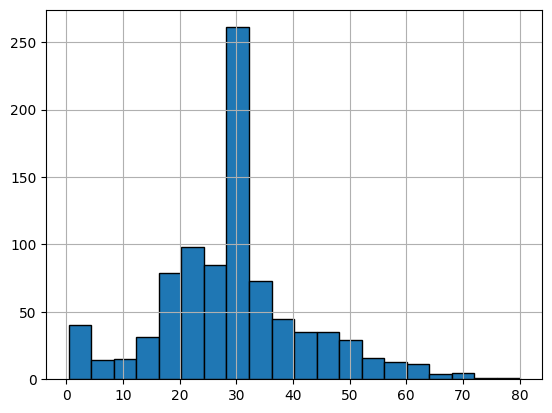

In [ ]:
df = pd.read_csv("data/titanic.csv", sep=",")
df["age"].hist(bins=20, ec="black") # ec = "black" gives the borders of our histogram a black colour

From this histogram, you can immediately see most of the passengers were near 30, with a much smaller number at high ages.  

What if we compare the histograms of the passengers who survived and did not survive?

<Axes: >

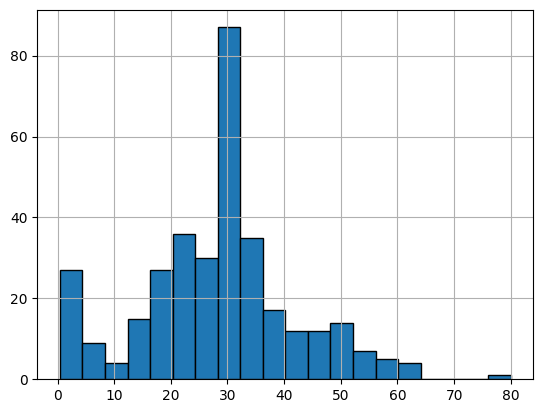

In [ ]:
df[df["survived"] == 1]["age"].hist(bins=20, ec="black")

# we combine the filtering for survival, and then separately use square brackets to get the "age" column 

<Axes: >

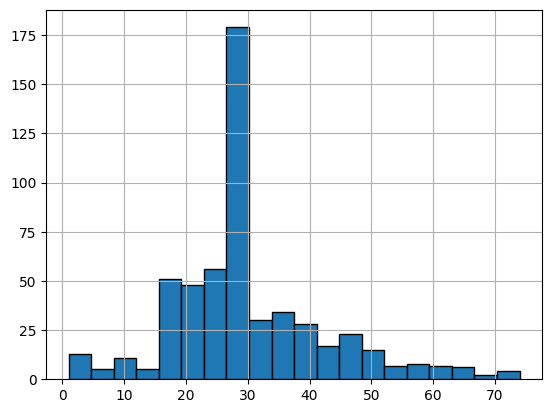

In [47]:
df[df["survived"] == 0]["age"].hist(bins=20, ec="black")

* Histograms using `df[COLUMN].hist()` are useful for visualising distributions, which is very often something we are interested in
* For numerical data, we can also plot it as a straight line graph using `df[COLUMN].plot()`. This is most useful when we have data that represents some process over time, like temperatures

<Axes: >

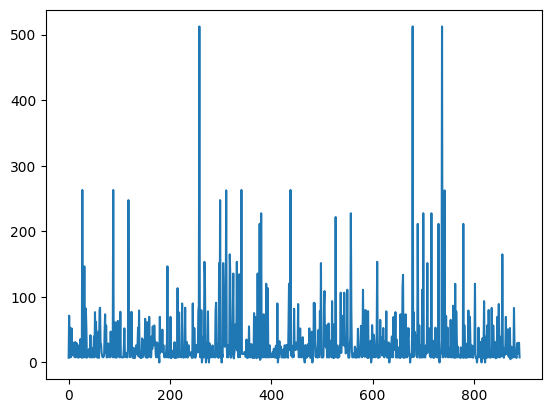

In [ ]:
df["fare"].plot()

See, *we* can plot fare, but it doesn't really tell us very much. The y-axis is the column we are plotting and the x-axis is the index. If the dataframe index represented time, then `.plot()` would be more useful

&#x2753; Using the Iris dataset (`"data/file1.csv"`), plot a separate histogram of the petal width for each of the three species. Can you see any notable differences?

<details>
<summary><strong>Hint</strong> (click to reveal)</summary>

* First, what are the different species? Remember you can use `.value_counts()`
* Remember to string together the logical statement and the column you want, like `df[df["species"] == ""][column_I_want]`
</details>

In [62]:
df = pd.read_csv("data/file1.csv", sep=",")

<div style="
border: 2px solid #444;
border-radius: 6px;
padding: 12px;
">

We are compressing the exploratory data analysis phase a lot here. Normally, this would take weeks and might involve things a lot more than just filtering and looking at the statistics of various columns!  

In particular, biological data is very often not good quality. There is missing data, errors, poorly formatted data and many other problems. The act of making the dataset usable for analysis is known as **data cleaning** and is a very important part of working with health data. However, it is quite tedious and so we aren't covering it at all in this course. Some of the key steps involved in cleaning data though are: 
* deciding when it is safe to drop particular patients (for example if they have very little data)
* deciding when we can drop entire columns (for example if most patients are missing data)
* deciding how we can fill in missing data (for example by replacing the missing values with the average value of the not missing elements)

</div>

The absolute most important rule in exploratory data analysis though is to **always visualise your data**. This might mean histograms, plots or the UMAP technique we're about to show. Or it might mean printing out the dataframe and inspecting its statistics to try to identify any potential problems

---

### 6) Uniform Manifold Approximation and Projection (UMAP)

Time to explore a real biological dataset!  
We are going to analyse an open-source RNAseq dataset of head and neck squamous cell carcinomas. This data was taken from `cBioPortal` which is a fantastic resource for genomics: https://www.cbioportal.org/. It contains various datasets from different cancers, for different modalities (genetic data, RNA, clinical covariates) etc and is generally just a spectacular resource for solving problems you might come across

We are now going to see how to use the UMAP (Uniform Manifold Approximation and Projection) technique to visualise very high-dimensional data. First, let's read in the biological data. The file is in the `"data"` folder and is called `"hnsc_dataset.csv"`

In [68]:
df = pd.read_csv("data/hnsc_dataset.csv", sep=",", index_col="Patient ID") 
# we are using index_col to tell pandas to use the Patient ID column as the index

First, let's do some exploratory data analysis. Try to answer these questions

&#x2753; 
1) How many genes are in the dataset?
2) How many patients do we have?
3) What is the mean expression of "GSTM1"?
4) What is the standard deviation in expression of "ABO"?
5) Plot a histogram of the expression level of one of the genes (choose whichever you want)

The problem with this kind of data visualisation really quickly should become obvious. With a large number of features, it becomes impossible and not useful to try to visualise them one-by-one. This is where **dimensionality reduction** is important. It allows us to reduce the information included in the full dataset to a much smaller selection of features which we can use for analysis. Remember from the lecture that there are many different ways of doing this: 
* using biological information like pathways, differentially expressed genes, known related factors
* using machine learning methods like autoencoders
* using other techniques, like UMAP (which is technically a machine learning technique)

To use UMAP, we use the `umap-learn` library: https://umap-learn.readthedocs.io/en/latest/ 
  
Unfortunately, this is definitely one of the less well-documented functions. This code snippet below shows how we can use UMAP on a dataset to visualise it. `Matplotlib.pyplot` and `seaborn` are both plotting libraries which allow us to visualise and plot data/images. They can be quite complex and take a lot of experience to use well, so don't worry too much about trying to understand them. It's fine to just reuse the code from this snippet later on, or rely on ChatGPT to write the plotting code.

First, we import the libraries we need and read in the data

In [106]:
import pandas as pd 

# this is the import for the UMAP library
import umap as umap 

# these are plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# first, we read in a dataset. Let's use Iris from earlier
df = pd.read_csv("data/file1.csv", sep=",")

For UMAP to work, it needs the data to only be numerical. It cannot work on "words". Remember that the Iris data has 5 columns: 
* sepal_length: number
* sepal_width: number
* petal_length: number
* petal_width: number
* species: WORD!

We need to get rid of the species column. The best way to do this is with:

In [107]:
iris = df.drop(columns="species")
print(iris.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


Now we just have the numerical columns, so we can use UMAP. We first set up a UMAP object that we are going to use. 
  
UMAP has two (main) parameters that we can adjust: 
* `n_neighbors`
* `min_dist`

The plots that we get **strongly** depend on these parameters. So what do each of them actually do?

* UMAP works by understanding how each data point compares to every other data point in the full dataset (all 1000 genes), and then trying to find points in 2D that behave in the same way. `n_neighbors` tells it how many points it should compare each data point to. If `n_neighbors` is large, you're asking UMAP to make each data point look like a lot of others, so it tends to find larger clusters but remove fine-scale features. If `n_neighbors` is small, you might get fine-scale features but the UMAP plot might look very spiky and not smooth
* `min_dist` sets how close together the points are allowed to be in 2D. If it is small, you get a much smoother plot. If it is larger, you get a more disconnected plot

A really important thing to understand is that **there is no single correct value for these**. UMAP is doing something known as *representation learning*. Whatever value of `min_dist` and `n_neighbors` you pick, it is still "correct". The purpose of UMAP is visualisation and data exploration, not getting final absolute answers. You should pick whatever values of `min_dist` and `n_neighbors` help you to understand your data. Sensible "default" values are `n_neighbors=15` and `min_dist=0.1`.

The cell below sets up the UMAP object. It should be obvious how you can change those parameters.

In [108]:
umap_obj = umap.UMAP(n_neighbors=15, min_dist=0.1)

We now use UMAP to transform our data into "embeddings", which is what we call the lower dimensional space. We do this with the `.fit_transform()` function.

In [ ]:
print(iris.shape)

# you can see that iris has 150 rows and 4 columns, for "sepal_length", "sepal_width", "petal_length", "petal_width"

embeddings = umap_obj.fit_transform(iris)

(150, 4)


The next cell isn't going to make very much sense. Don't try to understand it. This is a cell to ensure you can plot the UMAP embeddings so you can see what they are showing you. It is fine to copy and adapt this code for your later uses.

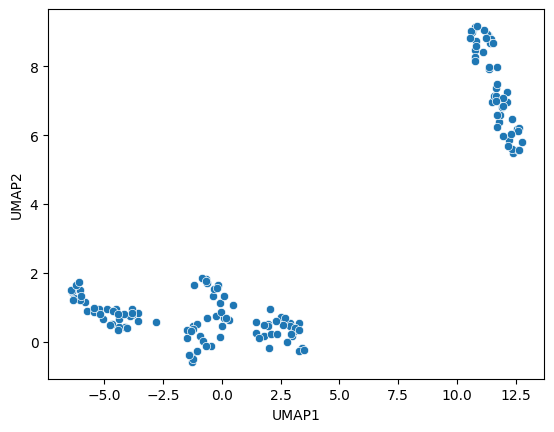

In [112]:
embeddings_df = pd.DataFrame(embeddings, index=iris.index, columns=["UMAP1", "UMAP2"])
fig, ax = plt.subplots()
sns.scatterplot(embeddings_df, x="UMAP1", y="UMAP2", ax=ax)
plt.show()

You can see that in the embedding space, we get a few distinct "blobs" of data. This is interesting! This is the kind of thing we're looking for in our biological data - can we find groups of patients that also form blobs? 

Those are distinct patients, who might have: 
* distinct biology
* distinct outcomes

Identification of these groups *is* biomarker discovery

But hang on a minute, we actually know what we're doing in the Iris dataset! We dropped a column, remember. That was the species of Iris. If we put that information back in, maybe it helps us identify the blobs in the UMAP?  

We show you how to do that in the below cell. Again, do not try to understand the code. It's fine to copy and adapt it later. What we're actually doing here is adding a column to `embedding_df` with the species information, then colouring our UMAP by that information using the `hue` parameter in `scatterplot`.

In [114]:
embeddings_df = pd.DataFrame(embeddings, index=iris.index, columns=["UMAP1", "UMAP2"])
print(embeddings_df.head())

# you can see it only has two columns

       UMAP1     UMAP2
0  11.902303  6.825147
1  11.317626  8.906790
2  10.739387  8.477966
3  10.801430  8.729704
4  12.123426  6.979292


In [ ]:
embeddings_df["Species"] = df["species"]

print(embeddings_df.head()) 

# now it has three columns including the species

       UMAP1     UMAP2 Species
0  11.902303  6.825147  setosa
1  11.317626  8.906790  setosa
2  10.739387  8.477966  setosa
3  10.801430  8.729704  setosa
4  12.123426  6.979292  setosa


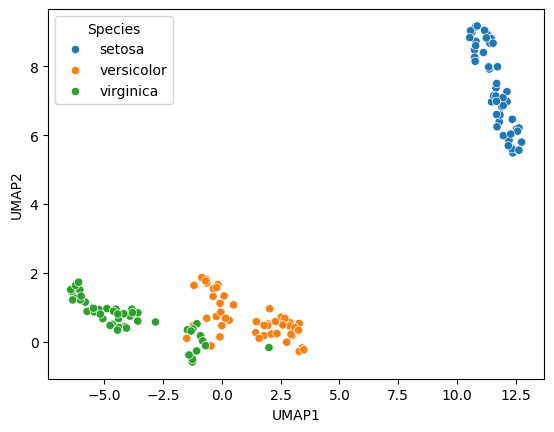

In [117]:
fig, ax = plt.subplots()
sns.scatterplot(embeddings_df, x="UMAP1", y="UMAP2", hue="Species")
plt.show()

Excellent! That's explained a lot - it shows us that the different groups really do identify the different iris species. This is a really nice result!

In biological data, this sort of result would then go on to identify whether those different groups associated differently with outcomes. We might call the groups **subtypes** of the disease/biology.

&#x2753;
By adapting the code below, see what happens if we change the value of n_neighbors and min_dist. How does the plot change? 

Make sure to try the following combinations: 
* `n_neighbors = 2, min_dist = 0.1` 
* `n_neighbors = 20, min_dist = 0.0` 
* `n_neighbors = 20, min_dist = 1.0`

There are limits to the values you can pick! Neither `min_dist` nor `n_neighbors` can be extremely large or extremely small, or you'll get a `ValueError` 

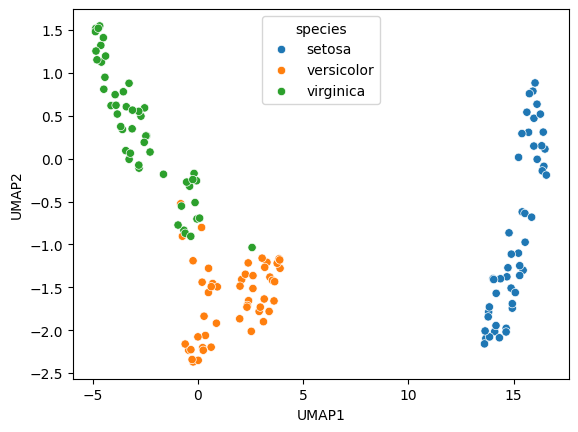

In [139]:
umap_obj = umap.UMAP(n_neighbors=15, min_dist=0.1)

embeddings = umap_obj.fit_transform(iris)
embeddings_df = pd.DataFrame(embeddings, index=iris.index, columns=["UMAP1", "UMAP2"])
embeddings_df["species"] = df["species"]

fig, ax = plt.subplots()
sns.scatterplot(embeddings_df, x="UMAP1", y="UMAP2", hue="species")
plt.show()

---

&#x2753;

By following the example above, use UMAP to visualise the HNSC data. See how it depends on `min_dist` and `n_neighbors`. Do you think there are any clusters in the data? How many?

In [ ]:
import pandas as pd 

# this is the import for the UMAP library
import umap as umap 

# these are plotting libraries
import matplotlib.pyplot as plt 
import seaborn as sns

# first, we read in a dataset. Let's use Iris from earlier
df = pd.read_csv("data/hnsc_dataset.csv", sep=",", index_col="Patient ID")

# write the rest of your code here

... 

---


Once you're done playing around with the above example, you may notice a problem!

With the iris dataset, we had a column "species" that happened to perfectly explain the clusters/blobs in our UMAP. But with the HNSC cancer, what do the groups mean? 
  
You'll have to analyse the data to find out! This is really the biological interpretation part. We would then do analysis to try to determine what is the underlying features for those groups, which might help us explain what the different groups correspond to! 
  
If you were doing biomarker discovery, this phase would be a lot of the work! It is beyond the scope of this lecture, but identifying what characterises these different groups is left as an exercise for you, if you're interested. There is a file, called `hnsc_clinical_data.csv` in the `data` directory which includes the clinical covariates. If you wanted, you could analyse that data to try to understand what these different groups are! (Although it's worth noting that this could be quite a lot of work!)

<details>
<summary><strong>Hint</strong> (click to reveal)</summary>

You would need to match the patients in the clinical data with their respective RNA sample. You could use the `merge` function from `pandas` to do this, although we'd recommend using ChatGPT to help you!
You may find it very informative to colour your UMAP by the "Subtype" column in the clinical data, once you have matched the files. This may give you a clue about what you might be seeing.

This paper may also be useful: https://pmc.ncbi.nlm.nih.gov/articles/PMC8476885/ 

</details>

---

### 7) Supervised Machine Learning

So to summarise, in the previous step, we identified groups of distinct patients in our dataset. The "biomarker" for these patients is the pattern in the data that defines the different groups. We can use supervised machine learning to find this. 

In machine learning, a classifier model takes in some data and tries to predict labels for that data. For example, image recognition is a type of classifier model where we take in images and predict what the image is showing us. The model is train in a supervised way, where we give it examples of the data and the known labels and the model learns to predict the label based on the patterns in the data

Our goal during this exercise is to build a model that takes in our biological data as input, and predicts the group of patients. We could use this model to:
* predict which group future patients would fall into
* identify the patterns in the data, which we can interpret to try to understand the biology
* build a diagnostic test

The `scikit-learn` library is the primary resource for building machine learning algorithms. It also has very detailed guides on how to use it, and the different tasks you can carry out with machine learning. We strongly recommend that you take a look: https://scikit-learn.org/stable/ 

---

In the next few cells, we're going to show you how to carry out this supervised classification task on the Iris dataset. 

First, we import the libraries we need. Notice that `scikit-learn` is actually imported as `sklearn`. 

In [144]:
import pandas as pd 
import sklearn as skl

Now we import the iris dataset, and remind ourselves of the columns

In [146]:
df = pd.read_csv("data/file1.csv", sep=",")
print(df)

     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


For machine learning, we need to identifyL
* our "features", which we usually call `X`: these are the columns in the data that we use to make our prediction
* our "target", which we usually call `y`: this is the label that we are trying to predict

For the iris dataset, our "target" is the `species` column and our "features" are all the other columns. We can use a combination of pandas filtering and the `.drop()` function to get these two parts.

For supervised machine learning, we must only have 1 target column, and there must be a label for each row. Therefore, `df[["species", "petal_width"]]` wouldn't be a valid target, because there are two columns.

In [147]:
X = df.drop(columns="species") # features
y = df["species"] # target

print(X)
print()
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: str


With traditional statistics, we're often trying to find the parameters of some known distribution to characterise our data. For example, if we believe our data might be a Gaussian/Normal distribution, we would try to find the mean and variance of our data to fit that Gaussian. This means that with normal statistics as we collect more and more data, if we've picked the correct distribution, we converge to some values for the parameters. 

This is not the case for machine learning algorithms. ML models are so flexible that as we add more data, they tend to find patterns in that data. In some ways, this is great because it allows us to model really complex distributions in our data. However, it carries risk. We have to be careful about **overfitting**, which is where the model starts to predict noise in the data rather than the trend we are interested in.  
  
To guard against this, it is important that we do **train-test splitting**, which is where we take our original data and split it up.
* The training data is used to train the model
* The testing data is only used at the end to evaluate how good the model is
If we do not do train-test splitting, when we try to evaluate the model, we will be evaluating on the training data. Due to overfitting, this means that we can get an over optimistic measurement of the model performance. 

**You must always split your data between train and test**.  
Luckily `scikit-learn` offers functions to make this nice and easy.

In [148]:
# first we import the train_test_split function from the sklearn.model_selection library
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

You can see that we need to split both the features and the targets. The order of the variables on the left hand side matters a lot. It should always be `X_train, X_test, y_train, y_test`, where `X_train` is the features for the training set and `y_train` is the labels for the training set. The other parameters for `train_test_split` are:
* `test_size` which tells us how big our test data set is. A `test_size = 0.2` means that the testing set is $20\%$ of the full dataset, which is usually a sensible size
* `random_state` which is the seed for the random number generator. By setting it to a particular value, we ensure that we get the same train-test split every time, which is important for reproducibility. Machine learning scientists love sci-fi, so it's pretty common to see it set to $42$

A confession here - everyone in ML copies this function from past work or demonstrations. It's so easy to forget what orde the function should be in, so it's totally fine to reuse this code

---

Next, we need to set up a model object, with its parameters. A good general purpose model is a *random forest*. If you want some more information, feel free to check out some of the following resources: 
* StatQuest with Josh Starmer: https://www.youtube.com/watch?v=J4Wdy0Wc_xQ
* Stemplicity: https://www.youtube.com/watch?v=Y85XV45x0VU
* Victor Zhou: https://victorzhou.com/blog/intro-to-random-forests/ 

Most machine learning algorithms have **hyperparameters**. These are parameters that affect how the algorithm behaves, and can change how accurately it can classify data. However, they are not learned directly from the training data. They are parameters that you (the user) needs to set manually.  
  
**Hyperparameter Optimisation** is the task of picking these hyperparameters so that our machine learning algorithm performs as well as it possibly can. It is an important part of using machine learning models. However, we are not going to handle it in this course. If you are interested, you can check out this link (https://www.geeksforgeeks.org/random-forest-hyperparameter-tuning-in-python/).  
  
For random forests, the most important hyperparameters are: 
* `random_state`: As with train-test splitting, a number that ensures our model is reproducible every time we run the code 
* `n_estimators`: The number of decision trees in our random forest. Normally, 100 is a sensible number. 
* `max_depth`: How deep each decision tree in the forest is allowed to go before we build a new one. Normally, 10 is a sensible number. 
  
There are other hyperparameters too, but we will not adjust these

The cell below shows how we can build a random forest model

In [149]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)

Next, we fit our random forest model. This is also known as model "training". Notice that we train on `X_train` and `y_train`.

In [150]:
rfc.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",200
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",10
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y

Now, we can use the model to make predictions for our testing dataset

In [152]:
y_pred = rfc.predict(X_test)
print(y_pred)

['versicolor' 'setosa' 'virginica' 'versicolor' 'versicolor' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica' 'setosa'
 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'setosa' 'virginica' 'setosa' 'virginica'
 'virginica' 'virginica' 'virginica' 'virginica' 'setosa' 'setosa']


You can see that the model has predicted species for the other samples in `X_test`.

We can also retrieve probabilties for each of the predictions. The machine learning method doesn't actually output labels, it outputs a probability which corresponds to how much the model believes that a sample belongs with that label. This is often more useful. We can get this using:

In [ ]:
y_prob = rfc.predict_proba(X_test)

print(y_prob)

[[0.    0.985 0.015]
 [0.985 0.015 0.   ]
 [0.    0.015 0.985]
 [0.    1.    0.   ]
 [0.    0.86  0.14 ]
 [1.    0.    0.   ]
 [0.    1.    0.   ]
 [0.    0.055 0.945]
 [0.    0.845 0.155]
 [0.    1.    0.   ]
 [0.    0.03  0.97 ]
 [1.    0.    0.   ]
 [0.94  0.06  0.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]
 [0.005 0.96  0.035]
 [0.    0.    1.   ]
 [0.    1.    0.   ]
 [0.    0.99  0.01 ]
 [0.    0.005 0.995]
 [1.    0.    0.   ]
 [0.    0.09  0.91 ]
 [1.    0.    0.   ]
 [0.    0.005 0.995]
 [0.    0.    1.   ]
 [0.    0.035 0.965]
 [0.    0.035 0.965]
 [0.    0.    1.   ]
 [1.    0.    0.   ]
 [1.    0.    0.   ]]


If I print the first element in `y_prob`, you can see that the model thinks that the sample is $98.5\%$ likely to be the second species (versicolor) and $1.5\%$ likely to be the third species (virginia)

In [156]:
print(y_prob[0,:])

[0.    0.985 0.015]


In the next cell, we put all the code in one place, so you can see it all together

In [ ]:
import pandas as pd 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("data/file1.csv", sep=",")

X = df.drop(columns="species") # features
y = df["species"] # target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rfc = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)
y_prob = rfc.predict_proba(X_test)

---

---

Let's try another example: the head and neck cancer example from earlier. 

&#x2753;
* Adapt the cells below, using the information from the iris example, to build a random forest to classify head and neck cancer.  
* We've added a column from the clinical data, called "Subtype". **You do not need to understand how we went about adding this**.  
* Try to build a random forest that can predict "Subtype" from the RNA data

In [7]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("data/hnsc_dataset.csv", sep=",", index_col="Patient ID")
clin = pd.read_csv("data/hnsc_clinical_data.tsv", sep="\t", index_col="Patient ID")

# YOU CAN IGNORE HOW THIS LINE WORKS!
df = df.merge(clin[["Subtype"]], how="inner", left_index=True, right_index=True)

##### 
# Start writing your own code down here

X = df.drop()
y = df["Subtype"]

X_train, X_test, y_train, y_test = ... 

rfc = ...

rfc.fit(...)

y_pred = rfc.predict(...)
y_prob = ...

ValueError: Need to specify at least one of 'labels', 'index' or 'columns'

### 8) Model Evaluation

As we've said a few times, machine learning is an *empirical* sceince. There is often not a theoretically "best" model, we just pick the model that performs the best at the task that we are interested in.  
Choosing this model is task of *model evaluation* and *model selection*. As ever, there is a really good description of this and some examples in the `scikit-learn` documentation. This paper has a really nice summary of it too: https://arxiv.org/pdf/1811.12808 

There are many aspects to model evaluation that give us different pieces of information. In this course, we are going to talk about just one: the receiver-operating-characteristic (ROC) curve. This was described extensively in the lecture notes.  
  
Remember:
* a random model lies on the diagonal line and has area under the curve 0.5
* a perfect model has an area under the curve of 1.0

So a "better" classifier model produces an area under the curve that is closer to 1.0

We can use inbuilt functions in `scikit-learn` to calculate the ROC curve and the area underneath it. The code below shows how to do that for the HNSC dataset example. It is totally fine to copy and reuse this code in other examples.

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# we need to use the probabilities to find the ROC curve, not the predictions themselves
y_prob = rfc.predict_proba(X_test)

# we put in the true labels (y_test) and the predicted probabilities y_prob
# we use [:, 1] to get the second column of the y_prob array (the positive predictions)
# since the probabilities always add up to 1, we only actually need one of them and we have the other automatically
roc_auc = roc_auc_score(y_test, y_prob[:,1])
print(roc_auc)

# we can also plot the ROC curve itself
fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])

fig, ax = plt.subplots()
ax.plot(fpr, tpr, color="red")
ax.plot([0, 1], [0, 1], color="k", linestyle='--')
ax.set_xlabel("False Positive Rate")
ax.set_ylabel("True Positive Rate")
plt.show()

NameError: name 'rfc' is not defined

### 9) DESNT and Prostate Cancer

# &#x2753;

This is a final exercise for you to practice all the things we've seen in the previous exercises. We have another dataset of RNAseq data, this time for prostate adenocarcinoma, which is the most common cancer in men.  
  
The primary challenge in prostate cancer is finding biomarkers that distinguish between low-risk, indolent disease where treatment can be de-escalated and high-risk cancer where aggressive treatment is needed.

DESNT is a proposed way of subtyping prostate cancer into high-risk and low-risk disease. It was first introduced in tnis paper: https://www.eu-focus.europeanurology.com/article/S2405-4569(17)30025-1/fulltext. You do not need to read the paper, but it can motivate the problem that we are trying to address if you are interested.  

The original DESNT classification split up prostate cancers into 10 different groups, with 2 of them high-risk. It was based on RNAseq data. We've simplified the problem a bit, so you will be given a dataset with 1000 genes and a column called "DESNT_Status" which is either "1" or "0". "1" here refers to the two high-risk DESNT groups, where "0" refers to the eight lower-risk DESNT groups.  

Your task is to build a random forest to predict DESNT status from RNAseq data. You can use the code in previous exercises to do this. Make sure that you evaluate the model using the ROC-curve and the area under the ROC curve, to establish how good the model is.

<details>
<summary><strong>Extension</strong> (click to reveal)</summary>

Once you've built a model to predict DESNT status from RNAseq data, there are a few extensions you could think about looking into: 
* The RandomForest that you've used to predict DESNT has hyperparameters, as we discussed earlier. How does the ROC curve and area under it change if you change these parameters? How high can you make the area under the curve by just changing these?
* A random forest isn't the only model you could use for prediction! How does it compare to: `sklearn.neural_network.MLPClassifier` or `sklearn.tree.DecisionTreeClassifier`. Which model performs the best in this problem?
* Not all 1000 of the RNA features are actually useful in predicting DESNT status. Using ChatGPT, looking in "SHAP values" can you find a way to reduce the number of genes in the test without changing the prediction accuracy?

</details>

In [5]:
## write your code here

import pandas as pd 

df = pd.read_csv("data/desnt_dataset.csv", sep=",", index_col="SAMPLE_ID")
df.head()

,DESNT_Status,AANAT,ABCC11,ABCC6P1,ABHD12B,ABO,ACRV1,ACTBL2,ADAD2,ADAM2,...,ZIM2,ZNF157,ZNF215,ZNF366,ZNF488,ZNF492,ZNF727,ZNF835,ZP1,ZSCAN1
SAMPLE_ID,,,,,,,,,,,,,,,,,,,,,
TCGA-2A-A8VL-01,Negative,0.000000,0.119146,0.561262,0.329162,0.661124,0.088117,0.000000,0.214586,0.629245,...,0.000000,0.309641,0.619815,0.523778,0.392332,0.445726,0.553848,0.550153,0.565760,0.782007
TCGA-2A-A8VO-01,Positive,0.000000,0.417178,0.365266,0.000000,0.175122,0.638438,0.198816,0.331250,0.516595,...,0.000000,0.222869,0.171595,0.645184,0.115639,0.000000,0.104470,0.379356,0.543410,0.663852
TCGA-2A-A8VT-01,Negative,0.214568,0.251113,0.615095,0.145549,1.000000,0.440768,0.122140,0.331006,0.705457,...,0.146206,0.325093,0.480499,0.616373,0.550135,0.495654,0.261089,0.887860,0.169667,0.645102
TCGA-2A-A8VV-01,Positive,0.000000,0.282514,0.000000,0.000000,0.214199,0.589013,0.000000,0.284799,0.596686,...,0.354699,0.000000,0.288490,0.523979,0.150534,0.397765,0.248044,0.717047,0.561597,0.757738
TCGA-2A-A8VX-01,Positive,0.477714,0.544155,0.343232,0.000000,0.147063,0.320358,0.000000,0.187497,0.056082,...,0.000000,0.000000,0.128452,0.000000,0.000000,0.000000,0.350775,0.374743,0.774383,0.759774


## Congratulations! 

Well done for getting to the end of the worksheet! We hope it was useful in giving you an introduction in how machine learning and data science can be used for biomarker discovery!  

If you've found any problems or errors in the worksheet, please feel free to email me to fix them (griffin.farrow@nds.ox.ac.uk). 

As we've said a few times, your machine learning learning journey doesn't end here! We've really only given a flavour and introduction to the topic, and there is a lot more to learn. However, the point of this notebook was to give you a familiarity with the workflow and the sort of questions we can answer with machine learning. There are important things we didn't have time to discuss in this notebook, including: 
* data cleaning and normalisation
* cross-validation and hyperparameter tuning
* neural networks (especially autoencoders and image recognition)
* clustering
* survival analysis  

But this will all have to wait until your next course!

If you're still interested, there are lots of resources where you can learn a lot more about machine learning. Here are some important ones: 
* `scikit-learn`: https://scikit-learn.org/stable/index.html is the definitive Python machine learning library. This has most of the functions you will use on a day-to-day basis, and reading this documentation is always a good way to start with your work 
* `PyTorch` and `Tensorflow`: https://pytorch.org/ are specialised libraries for neural networks and deep learning. If you want to use machine learning in your research, these are becoming increasingly important
* `Kaggle`: https://www.kaggle.com/ is a free resource with datasets, online notebooks and tutorials all showing how to use machine learning to solve various problems. It's also increasingly important in the industry to use Kaggle to build a portfolio
* `Google Machine Learning Crash Course`: https://developers.google.com/machine-learning/crash-course is a free course which teaches the basics of machine learning
* There are generally loads of papers, at all levels of difficulty, explaining machine learning topics. However, this paper is specifically aimed for people coming from a more biological background and is extremely well written: https://www.nature.com/articles/s41580-021-00407-0 